In [1]:
%config IPCompleter.use_jedi = False
%pdb off
%load_ext autoreload
%autoreload 3
import sys
from copy import deepcopy
from typing import List, Dict, Optional, Union, Callable
from pathlib import Path
import pathlib
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from attrs import define, field, Factory


Automatic pdb calling has been turned OFF


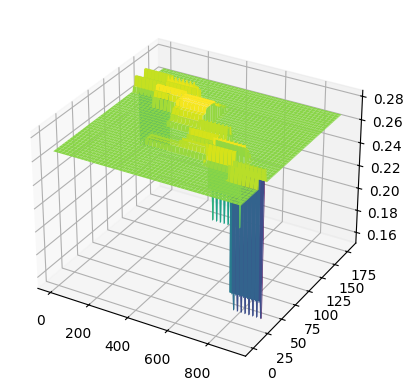

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from stl import mesh

height_map_path = Path('/home/halechr/Desktop/good_posterior.png').resolve()
assert height_map_path.exists()
stl_output_path = Path('/home/halechr/Desktop/good_posterior.stl').resolve()

# Load height map image
height_map = plt.imread(height_map_path)
if height_map.ndim == 3:  # if image has multiple channels
    height_map = height_map[:, :, 0]  # use one channel (e.g., red)

# Generate x, y coordinates
x = np.arange(0, height_map.shape[1])
y = np.arange(0, height_map.shape[0])
x, y = np.meshgrid(x, y)

# Plot 3D model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, height_map, cmap=cm.viridis)

# Show plot
plt.show()


In [5]:
# Generate vertices and faces for the 3D mesh
x, y = np.meshgrid(np.arange(height_map.shape[1]), np.arange(height_map.shape[0]))
z = height_map
vertices = np.zeros((x.size, 3))
vertices[:, 0] = x.flatten()
vertices[:, 1] = y.flatten()
vertices[:, 2] = z.flatten()

# Create faces
faces = []
for i in range(height_map.shape[0] - 1):
    for j in range(height_map.shape[1] - 1):
        idx = i * height_map.shape[1] + j
        faces.append([idx, idx + 1, idx + height_map.shape[1]])
        faces.append([idx + 1, idx + height_map.shape[1] + 1, idx + height_map.shape[1]])

faces = np.array(faces)

# Create the mesh
model_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        model_mesh.vectors[i][j] = vertices[f[j], :]

# Save as STL
model_mesh.save(stl_output_path)
